In [1]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
NVIDIA GeForce RTX 3050 6GB Laptop GPU


In [2]:
from fastai.vision.all import *
import timm

/home/husen/anaconda3/envs/mlgpu/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path =untar_data(URLs.PETS)/'images'

dls=ImageDataLoaders.from_name_func('.',
                                   get_image_files(path),
                                   valid_pct=0.2,
                                   seed=42,
                                   label_func=RegexLabeller(pat=r'^([^/]+)_\d+'),
                                   item_tfms=Resize(244))

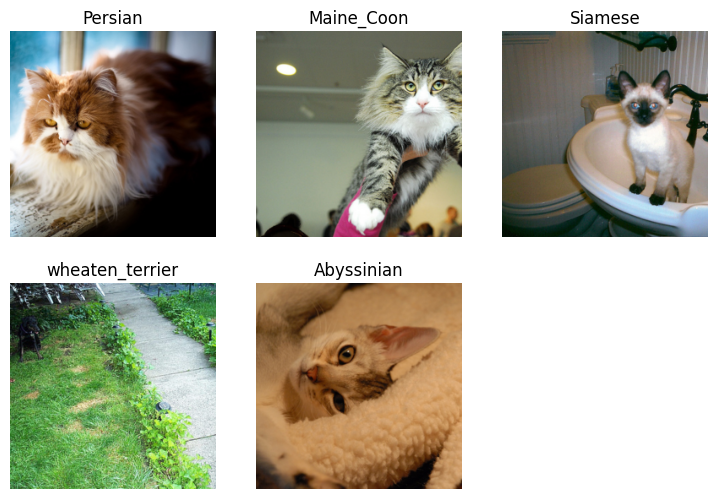

In [4]:
dls.show_batch(max_n=5)


In [5]:
learn=vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/husen/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [01:06<00:00, 1.30MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.436171,0.316575,0.109608,00:57


epoch,train_loss,valid_loss,error_rate,time
0,0.406725,0.294465,0.096076,01:07
1,0.267877,0.197970,0.071719,01:09
2,0.145466,0.186923,0.059540,01:10


In [7]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_atto_rms',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnext_zepto_rms',
 'convnext_zepto_rms_ols',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [8]:
learn=vision_learner(dls,'convnext_tiny',metrics=error_rate).to_fp16()
learn.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.976128,0.184305,0.066306,00:56


epoch,train_loss,valid_loss,error_rate,time
0,0.242810,0.149031,0.053451,01:47
1,0.183356,0.162628,0.053451,01:56
2,0.140873,0.143802,0.045332,02:10
3,0.103078,0.170588,0.047361,01:51
4,0.062865,0.126198,0.041272,01:39
5,0.032607,0.133392,0.039242,01:42
6,0.023126,0.137099,0.038566,01:44
7,0.014588,0.136036,0.037212,01:42


In [9]:
learn.export("model.pkl")

In [10]:
!pip freeze

annotated-types==0.7.0
anyio==4.11.0
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
arrow==1.4.0
asttokens==3.0.0
async-lru==2.0.5
attrs==25.4.0
babel==2.17.0
beautifulsoup4==4.14.2
bleach==6.2.0
blis==1.3.0
catalogue==2.0.10
certifi==2025.10.5
cffi==2.0.0
charset-normalizer==3.4.4
click==8.3.0
cloudpathlib==0.23.0
comm==0.2.3
confection==0.1.5
contourpy==1.3.2
cycler==0.12.1
cymem==2.0.11
debugpy==1.8.17
decorator==5.2.1
defusedxml==0.7.1
exceptiongroup==1.3.0
executing==2.2.1
fastai==2.7.13
fastcore==1.5.55
fastdownload==0.0.7
fastjsonschema==2.21.2
fastprogress==1.0.3
filelock==3.19.1
fonttools==4.60.1
fqdn==1.5.1
fsspec==2025.9.0
h11==0.16.0
hf-xet==1.2.0
httpcore==1.0.9
httpx==0.28.1
huggingface-hub==0.36.0
idna==3.11
ipykernel==7.0.1
ipython==8.37.0
isoduration==20.11.0
jedi==0.19.2
Jinja2==3.1.6
joblib==1.5.2
json5==0.12.1
jsonpointer==3.0.0
jsonschema==4.25.1
jsonschema-specifications==2025.9.1
jupyter-events==0.12.0
jupyter-lsp==2.3.0
jupyter_client==8.6.3
jupyter_core==5.9.